In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
import pickle

In [2]:
df = pd.read_csv('C:/Users/He wKai Feng/Desktop/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
pd.set_option("display.max_columns",None)

In [6]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [9]:
df=df.drop(columns=["customerID"])
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
print(df["gender"].unique())

['Female' 'Male']


In [11]:
print(df["SeniorCitizen"].unique())

[0 1]


In [12]:
numerical_feature_list=['tenure','MonthlyCharges','TotalCharges']
for col in df.columns:
    if col not in numerical_feature_list:
        print(col,':',df[col].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [13]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [14]:
#df[df['TotalCharges']==" "]

In [15]:
df["TotalCharges"]=df["TotalCharges"].replace({" ":"0"})
#df[df['TotalCharges']=='0']
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [16]:
df["TotalCharges"]=df["TotalCharges"].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [17]:
print(df['Contract'].value_counts())

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


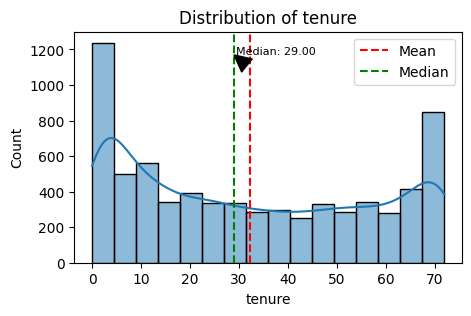

In [19]:
def plot_histogram (df,column_name):
    plt.figure(figsize=(5,3))
    ax=sns.histplot(df[column_name],kde=True)
    
    plt.title(f"Distribution of {column_name}")

    col_mean=df[column_name].mean()
    col_median=df[column_name].median()

    plt.axvline(col_mean, color="red",linestyle="--",label="Mean")
    plt.axvline(col_median, color="green",linestyle="--",label="Median")
    plt.annotate(f'Median: {col_median:.2f}', 
                xy=(col_median, ax.get_ylim()[1]*0.9),
                xytext=(col_median+0.5, ax.get_ylim()[1]*0.9),
                arrowprops=dict(facecolor='black', shrink=0.05, width=0.1),
                fontsize=8)
    plt.legend()
    plt.show()

plot_histogram(df,"tenure")

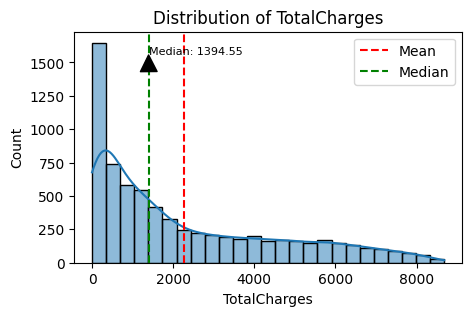

In [20]:
plot_histogram(df, 'TotalCharges')

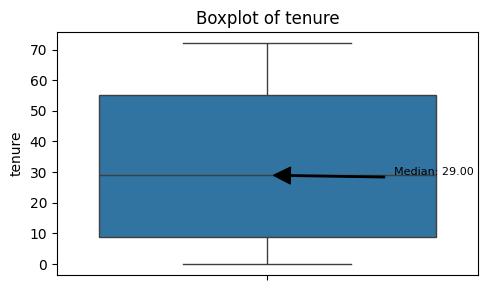

In [21]:
def plot_boxplot(df, column_name):
    plt.figure(figsize=(5, 3))
    ax = sns.boxplot(y=df[column_name])
    plt.title(f"Boxplot of {column_name}")
    plt.ylabel(column_name)
    col_median = df[column_name].median()
    plt.annotate(f'Median: {col_median:.2f}', 
                xy=(0, col_median),  
                xytext=(0.3, col_median),  
                arrowprops=dict(facecolor='black', shrink=0.05, width=1),
                fontsize=8)
    plt.tight_layout()
    plt.show()

plot_boxplot(df, "tenure")

In [22]:
#df=df[df['TotalCharges'].notnull()] 
#df

In [23]:
label_churn=df.iloc[:,6].values
label=df[['Churn']]
#label


features=df.iloc[:,[1,4,17]].values
#features
feature=df[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]
#feature

In [24]:
from sklearn.model_selection import train_test_split
features_train, features_test, label_churn_train, label_churn_test = train_test_split(
 features, label_churn, test_size = 0.2, random_state = 0) 

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
features_train = sc.fit_transform(features_train)
features_test = sc.transform(features_test)


In [26]:
label_churn_kernel=df.iloc[:,6].values
label_kernel=df[['Churn']]
#label

features_kernel=df.iloc[:,[1,4,17]].values
#features_kernel
feature_kernel=df[['SeniorCitizen','tenure','MonthlyCharges']]
#feature


In [27]:
from sklearn.model_selection import train_test_split 

features_kernel_train, features_kernel_test, label_churn_kernel_train, label_churn_kernel_test = train_test_split(features_kernel, label_churn_kernel, test_size=0.2, random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler ## feature scaling / normalisaƟon before we do classification

sc_kernel = StandardScaler()
features_kernel_train = sc_kernel.fit_transform(features_kernel_train)
features_kernel_test = sc_kernel.transform(features_kernel_test)
 
from sklearn.svm import SVC #svm-classification
svm_model=SVC(kernel = 'linear', random_state = 0)
svm_model.fit(features_kernel_train,label_churn_kernel_train)


SVC(kernel='linear', random_state=0)

In [29]:
from sklearn.tree import DecisionTreeClassifier #decision tree classifier-classficaƟon
classifier = DecisionTreeClassifier( criterion = 'entropy', random_state = 0)
classifier.fit(features_train, label_churn_train)
classifier


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [30]:
label_churn_kernel_pred = svm_model.predict(features_kernel_test)
label_churn_kernel_pred 

array(['No', 'Yes', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [31]:
label_churn_pred = classifier.predict(features_test)
label_churn_pred #predict value built by Decisiontreeclassfier

array(['Yes', 'Yes', 'Yes', ..., 'Yes', 'No', 'No'], dtype=object)

In [32]:
from sklearn.metrics import confusion_matrix
cm_classifier = confusion_matrix(label_churn_test, label_churn_pred) #confusion matrix of decision tree classifier
cm_classifier


array([[493,  24, 153],
       [ 22, 106,  12],
       [165,  18, 416]], dtype=int64)

In [33]:
print("Formula of accuracy is (TP/TN) / (TP+TN+FP+FN)")
sum_of_three_types_classifier=0
for i in cm_classifier:
     for j in i:
         sum_of_three_types_classifier+=j
#sum_of_TPandTN_classifier=493+106+416
sum_of_TPandTN_classifier=0
index=0
for i in cm_classifier:
    
    sum_of_TPandTN_classifier+=i[index]
    index+=1
print(f"Accuracy of classifier model is {sum_of_TPandTN_classifier/
sum_of_three_types_classifier}.")

Formula of accuracy is (TP/TN) / (TP+TN+FP+FN)
Accuracy of classifier model is 0.7203690560681334.


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [35]:
# Assuming my test set is 20% of your data (1409 samples)
final_df = pd.DataFrame({
    'Payment Method': df['PaymentMethod'].iloc[-len(label_churn_pred):],  # Use last 1409 rows
    'Totalcharges': label_churn_pred
})

final_df

,Payment Method,Totalcharges
5634,Electronic check,Yes
5635,Mailed check,Yes
5636,Electronic check,Yes
5637,Credit card (automatic),No
5638,Electronic check,Yes
...,...,...
7038,Mailed check,Yes
7039,Credit card (automatic),Yes
7040,Electronic check,Yes
7041,Mailed check,No


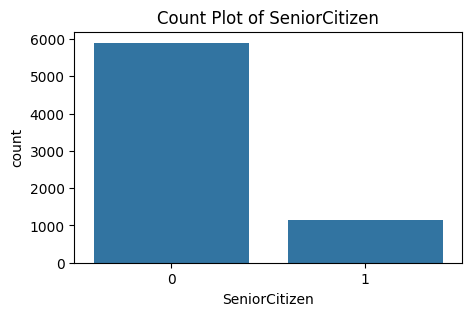

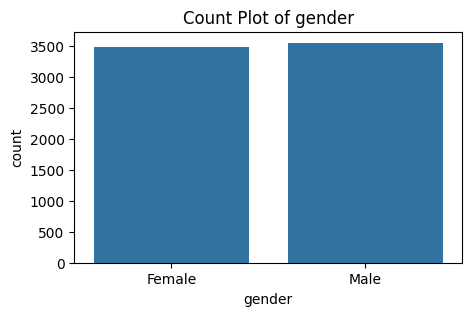

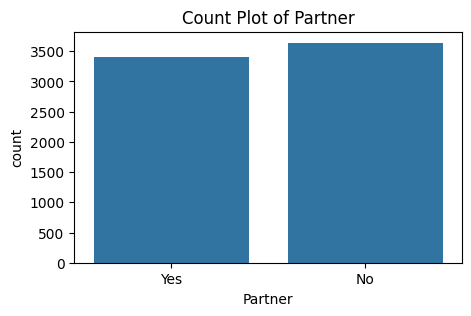

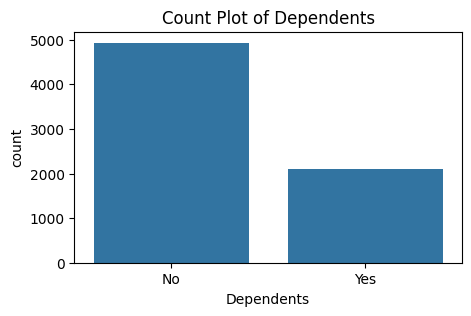

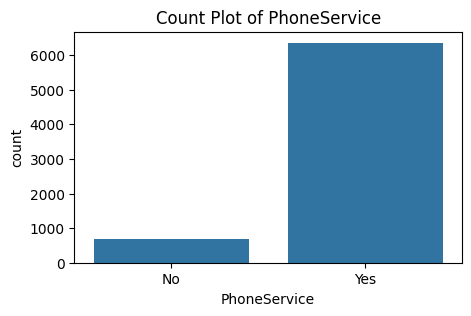

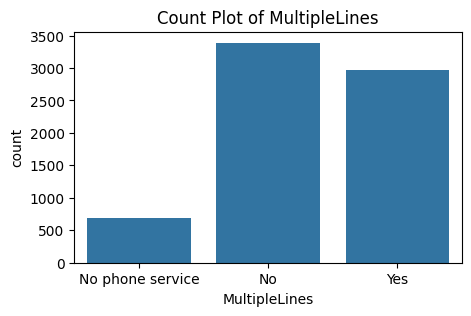

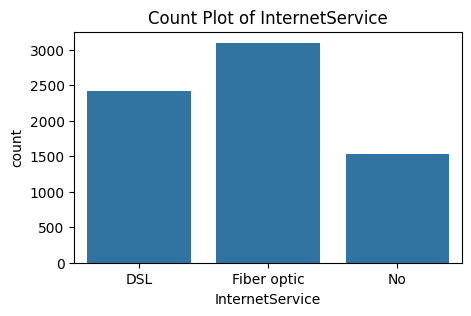

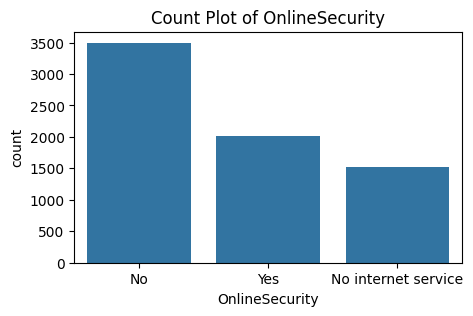

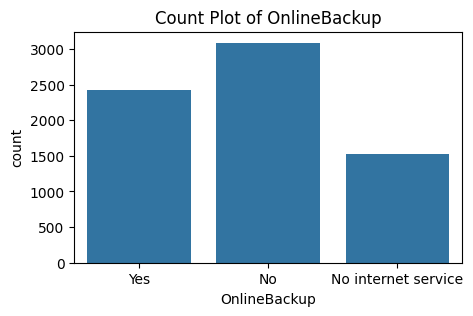

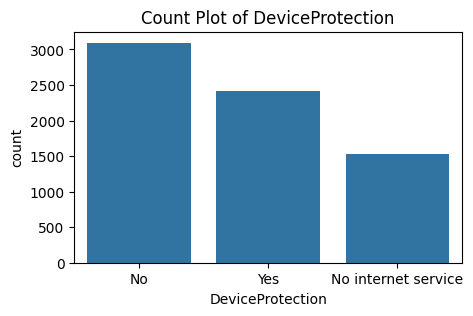

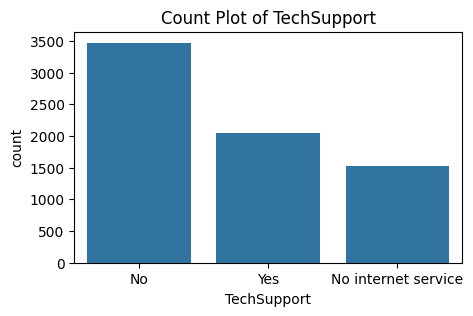

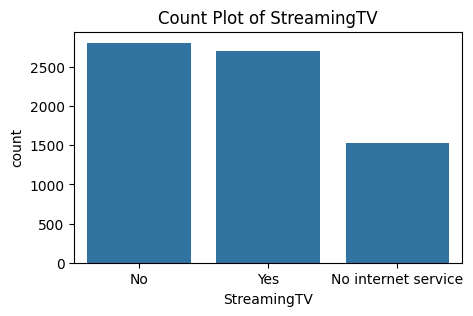

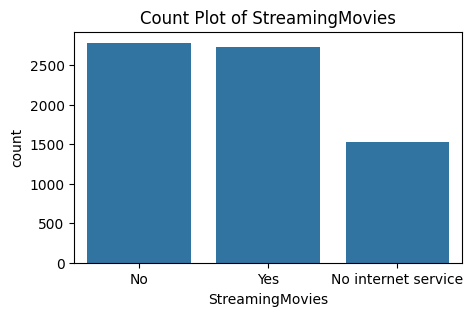

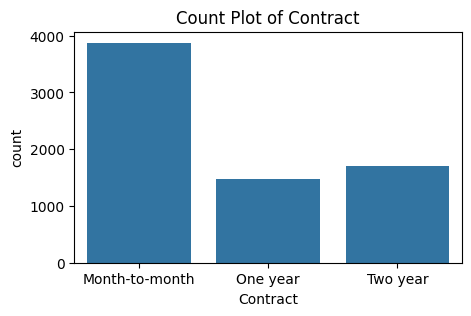

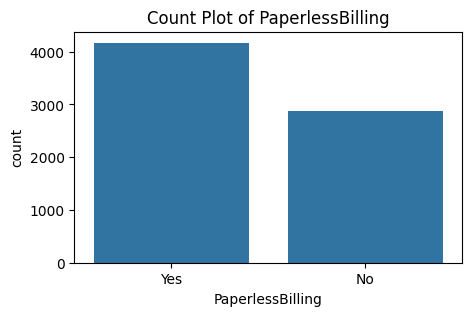

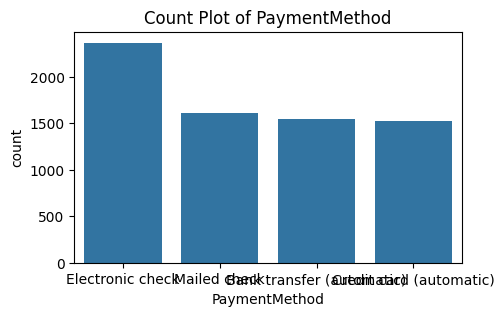

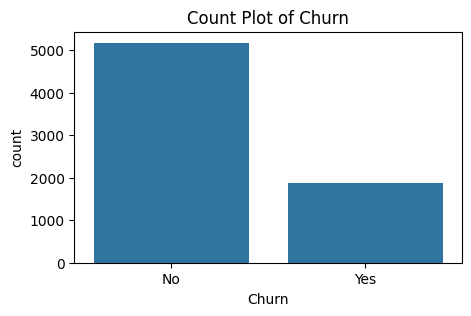

In [36]:
object_cols=df.select_dtypes(include="object").columns.to_list()
object_cols=['SeniorCitizen']+object_cols
object_cols
for i in object_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[i])
    plt.title(f"Count Plot of {i}")
    plt.show()

In [37]:
object_cols

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [38]:
df['Churn']=df['Churn'].replace({'Yes':1,'No':0})
df.head(3)

C:\Users\He wKai Feng\AppData\Local\Temp\ipykernel_34744\1096217665.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn']=df['Churn'].replace({'Yes':1,'No':0})


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [39]:
print(df['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [40]:
object_columns=df.select_dtypes(include="object").columns

In [41]:
encoders={}

#CONVERT CATEGORICAL VARIABLES TO NUMERICAL VARIABLES
for column in object_columns:
    label_encoder=LabelEncoder()
    df[column]=label_encoder.fit_transform(df[column])
    encoders[column]=label_encoder

# SAVE ENCODERS TO FILE FOR FUTURE USE
with open("encoders.pkl","wb") as f:
    pickle.dump(encoders,f)

encoders


{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [42]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [43]:
#REDO FEATURES TARFGET AGAIN

In [44]:
#splitting the features and target
X=df.drop(columns=['Churn'])
y=df['Churn']

In [45]:
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# X_train: 80% of features for training
# X_test:  20% of features for testing  
# y_train: 80% of target labels for training
# y_test:  20% of target labels for testing

print(y_train.shape)
#number of training samples

(5634,)


In [46]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


In [47]:
#SMOTE TECHNIQUE SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE
smote=SMOTE(random_state=42)
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)
print(y_train_smote.shape)

c:\Users\He wKai Feng\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


(8276,)


In [48]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


In [49]:
#TRAINING WITH DEFAULT HYPERPARAMETERS

#dictionary for models
models={"Decision Tree":DecisionTreeClassifier(),
        "Random Forest":RandomForestClassifier(),
        "XGBoost":XGBClassifier()}

In [50]:
#dictionary to store cross validation results
cv_scores={}

#perform 5-fold cross validation for each model
for model_name, model in models.items():
    print(f"Training{model_name} with default parameters.")
    scores=cross_val_score(model,X_train_smote,y_train_smote, cv=5,scoring="accuracy")
    # Split training data into 5 parts
    # Train on 4 parts, test on 1 part
    # Repeat 5 times with different test part
    # Get 5 accuracy scores for each model
    cv_scores[model_name]=scores
    print(f"{model_name} cross validation accuracy:{np.mean(scores):.2f}")
    print("-"*70)

cv_scores

TrainingDecision Tree with default parameters.


Decision Tree cross validation accuracy:0.78
----------------------------------------------------------------------
TrainingRandom Forest with default parameters.
Random Forest cross validation accuracy:0.84
----------------------------------------------------------------------
TrainingXGBoost with default parameters.
XGBoost cross validation accuracy:0.83
----------------------------------------------------------------------


{'Decision Tree': array([0.68538647, 0.71359517, 0.81812689, 0.83867069, 0.84531722]),
 'Random Forest': array([0.72463768, 0.77462236, 0.90634441, 0.89667674, 0.89969789]),
 'XGBoost': array([0.71074879, 0.75226586, 0.90271903, 0.89123867, 0.89909366])}

In [51]:
cv_scores

{'Decision Tree': array([0.68538647, 0.71359517, 0.81812689, 0.83867069, 0.84531722]),
 'Random Forest': array([0.72463768, 0.77462236, 0.90634441, 0.89667674, 0.89969789]),
 'XGBoost': array([0.71074879, 0.75226586, 0.90271903, 0.89123867, 0.89909366])}

In [52]:
#RANDOM FOREST MODEL GIVES THE HIGHEST ACCURACY COMPARED TO OTHER MODELS WITH DEFAULT PARAMETERS
rfc=RandomForestClassifier(random_state=42)
model.fit(X_train_smote,y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [53]:
#MODEL EVALUATION
y_test_pred=model.predict(X_test)
print("Accuracy score:\n",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_test_pred))
print("Classification Report:\n",classification_report(y_test,y_test_pred))

Accuracy score:
 0.7821149751596878
Confusion Matrix:
 [[876 160]
 [147 226]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      1036
           1       0.59      0.61      0.60       373

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.78      0.78      0.78      1409



In [54]:
#SAVE THE TRAIN MODEL AS A PICKLE FILE
model_data={'model':rfc,'features_names':X.columns.tolist()}
with open('customer_churn_model.pkl','wb') as f:
    pickle.dump(model_data,f)

In [55]:
#LOAD SAVED MODEL AND BUILD A PREDICTIVE SYSTEM

#load the saved model and encoders
with open('customer_churn_model.pkl','rb') as f:
    model_data=pickle.load(f)
loaded_model=model_data['model']
feature_names=model_data['features_names']

print(loaded_model)

RandomForestClassifier(random_state=42)


In [56]:
print(feature_names)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [57]:
input_data={'gender':'Female', 'SeniorCitizen':0, 'Partner':'Yes', 'Dependents':'No', 'tenure':1, 'PhoneService':'No', 'MultipleLines':'No phone service', 'InternetService':'DSL', 'OnlineSecurity':'No', 'OnlineBackup':'Yes', 'DeviceProtection':'No', 'TechSupport':'No', 'StreamingTV':'No', 'StreamingMovies':'No', 'Contract':'Month-to-month', 'PaperlessBilling':'Yes', 'PaymentMethod':'Electronic check', 'MonthlyCharges':29.85, 'TotalCharges':29.85}
input_data_df=pd.DataFrame([input_data])

with open('encoders.pkl','rb') as f:
    encoders=pickle.load(f)

#ensure categorical features using saved encoders
for column,encoder in encoders.items():
    if column in input_data_df.columns:
        input_data_df[column] = encoder.transform(input_data_df[column])
#make prediction
prediction=model.predict(input_data_df)
pred_prob=model.predict_proba(input_data_df)

print(prediction)
print("Prediction is Churn." if prediction==1 else 'No churn.')
print(f'Prediction probability:{pred_prob}')

[1]
Prediction is Churn.
Prediction probability:[[0.41020972 0.5897903 ]]


In [58]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}